In [ ]:
# load libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [ ]:
from sklearn import metrics

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# define data folder/path
path1 ='/content/drive/My Drive/CMU/2ndsem/MachineLearningandAI/Group_Project/Data_files/jonathan.csv'
path2 ='/content/drive/My Drive/CMU/2ndsem/MachineLearningandAI/Group_Project/Data_files/nikhil.csv'
path3 ='/content/drive/My Drive/CMU/2ndsem/MachineLearningandAI/Group_Project/Data_files/nikole.csv'


## Load Data 

In [ ]:
subject1 = pd.read_csv(path1)
subject2 = pd.read_csv(path2)
subject3 = pd.read_csv(path3)

In [ ]:
final_data = pd.concat([subject1, subject2, subject3], axis = 0, ignore_index=True)
final_data = final_data.drop(columns='s8')
# normaliza data after concatenating 
# final_data_values = final_data
final_data_values= final_data.iloc[:,1:8]/final_data.iloc[:,1:8].max(axis=0)


display(final_data_values)
# display(subject1)

,s3,s5,s7,s6,s2,s1,s4
0,5.755581e-03,5.082106e-03,8.315383e-03,8.845544e-03,1.687735e-02,5.911125e-03,2.742632e-02
1,5.753885e-03,5.075890e-03,8.311404e-03,8.833765e-03,1.683937e-02,5.940610e-03,2.788421e-02
2,5.752194e-03,5.069669e-03,8.307478e-03,8.821966e-03,1.680156e-02,5.970318e-03,2.834479e-02
3,5.750508e-03,5.063445e-03,8.303605e-03,8.810149e-03,1.676391e-02,6.000251e-03,2.880804e-02
4,5.748827e-03,5.057218e-03,8.299785e-03,8.798312e-03,1.672644e-02,6.030406e-03,2.927394e-02
...,...,...,...,...,...,...,...
7270821,5.898405e-02,4.915683e-02,9.095583e-02,5.662791e-02,3.434081e-02,2.623435e-02,2.643707e-02
7270822,5.865069e-02,4.889743e-02,9.064924e-02,5.636261e-02,3.412224e-02,2.609397e-02,2.635647e-02
7270823,5.831821e-02,4.863878e-02,9.034309e-02,5.609762e-02,3.390467e-02,2.595402e-02,2.627617e-02
7270824,5.798661e-02,4.838087e-02,9.003739e-02,5.583296e-02,3.368809e-02,2.581449e-02,2.619618e-02


In [ ]:
display(final_data)
final_data.labels.unique()

,Unnamed: 0,s3,s5,s7,s6,s2,s1,s4,labels,timestamp
0,9140,1.956354e-06,2.034820e-06,1.800159e-06,2.508100e-06,4.977649e-06,2.241447e-06,6.755994e-06,PINK,7.258235
1,9141,1.955778e-06,2.032331e-06,1.799297e-06,2.504760e-06,4.966447e-06,2.252627e-06,6.868789e-06,PINK,7.259029
2,9142,1.955203e-06,2.029841e-06,1.798447e-06,2.501415e-06,4.955295e-06,2.263893e-06,6.982244e-06,PINK,7.259823
3,9143,1.954630e-06,2.027349e-06,1.797609e-06,2.498064e-06,4.944192e-06,2.275243e-06,7.096357e-06,PINK,7.260618
4,9144,1.954058e-06,2.024856e-06,1.796782e-06,2.494708e-06,4.933139e-06,2.286677e-06,7.211124e-06,PINK,7.261412
...,...,...,...,...,...,...,...,...,...,...
7270821,132759,2.004901e-05,1.968186e-05,1.969061e-05,1.605650e-05,1.012816e-05,9.947836e-06,6.512310e-06,WFLX,105.426300
7270822,132760,1.993570e-05,1.957800e-05,1.962423e-05,1.598127e-05,1.006370e-05,9.894606e-06,6.492456e-06,WFLX,105.427100
7270823,132761,1.982269e-05,1.947444e-05,1.955796e-05,1.590614e-05,9.999528e-06,9.841537e-06,6.472676e-06,WFLX,105.427800
7270824,132762,1.970997e-05,1.937118e-05,1.949178e-05,1.583110e-05,9.935652e-06,9.788630e-06,6.452970e-06,WFLX,105.428600


array(['PINK', 'REST', 'WFLX', 'WEXT', 'WABD', 'THMB', 'RING', 'WADD',
       'HCLO', 'MIDL', 'INDX'], dtype=object)

In [ ]:
# convert labels to int
# Here the labels are assigned integer values based on alphabetical order

label_encoder = LabelEncoder()

int_labels = label_encoder.fit_transform(final_data.labels)

print(len(int_labels))

7270826


In [ ]:
index_change = np.where(np.diff(int_labels) != 0)[0] + 1
index_change = np.insert(index_change, 0, 0).tolist()
# Index change is the index of labels where the change in labels occurs 
# If index_change is 1 delete that element 
# index_change.append(len(final_data_values)-1)
print(len(index_change))
print(np.count_nonzero(np.diff(index_change)==1))

b = np.array((np.diff(index_change).tolist()))

imm_change = np.where(b == 1); print(imm_change)
int_labels[index_change[89]]

del_el = [index_change[a] for a in imm_change[0]]
#  Now delete these labels in int_labels
del_el[0]
verify = np.delete(int_labels, del_el)

index_change = np.where(np.diff(verify) != 0)[0] + 1

print(np.count_nonzero(np.diff(index_change)==1))
print(len(verify))

# Now delete the correcponding elements in the initial data frame 

final_data = final_data.drop(del_el)

final_data_values= final_data.iloc[:,1:8]/final_data.iloc[:,1:8].max(axis=0)

label_encoder = LabelEncoder()

int_labels = label_encoder.fit_transform(final_data.labels)

print(len(int_labels))
index_change = np.where(np.diff(int_labels) != 0)[0] + 1
index_change = np.insert(index_change, 0, 0).tolist()



5274
55
(array([  89,  179,  271,  365,  453,  543,  623,  695,  785,  879,  971,
       1055, 1143, 1231, 1319, 1411, 1505, 1607, 1703, 1801, 1917, 2015,
       2105, 2207, 2313, 2407, 2501, 2595, 2693, 2787, 2911, 3005, 3097,
       3185, 3289, 3379, 3485, 3589, 3685, 3779, 3875, 3989, 4079, 4163,
       4307, 4409, 4515, 4531, 4629, 4731, 4833, 4873, 4989, 5085, 5173]),)
0
7270771
7270771


In [ ]:
display(final_data)

print(index_change[-2], index_change[-1])

# Do not consider last element of dataframe

,Unnamed: 0,s3,s5,s7,s6,s2,s1,s4,labels,timestamp
0,9140,1.956354e-06,2.034820e-06,1.800159e-06,2.508100e-06,4.977649e-06,2.241447e-06,6.755994e-06,PINK,7.258235
1,9141,1.955778e-06,2.032331e-06,1.799297e-06,2.504760e-06,4.966447e-06,2.252627e-06,6.868789e-06,PINK,7.259029
2,9142,1.955203e-06,2.029841e-06,1.798447e-06,2.501415e-06,4.955295e-06,2.263893e-06,6.982244e-06,PINK,7.259823
3,9143,1.954630e-06,2.027349e-06,1.797609e-06,2.498064e-06,4.944192e-06,2.275243e-06,7.096357e-06,PINK,7.260618
4,9144,1.954058e-06,2.024856e-06,1.796782e-06,2.494708e-06,4.933139e-06,2.286677e-06,7.211124e-06,PINK,7.261412
...,...,...,...,...,...,...,...,...,...,...
7270821,132759,2.004901e-05,1.968186e-05,1.969061e-05,1.605650e-05,1.012816e-05,9.947836e-06,6.512310e-06,WFLX,105.426300
7270822,132760,1.993570e-05,1.957800e-05,1.962423e-05,1.598127e-05,1.006370e-05,9.894606e-06,6.492456e-06,WFLX,105.427100
7270823,132761,1.982269e-05,1.947444e-05,1.955796e-05,1.590614e-05,9.999528e-06,9.841537e-06,6.472676e-06,WFLX,105.427800
7270824,132762,1.970997e-05,1.937118e-05,1.949178e-05,1.583110e-05,9.935652e-06,9.788630e-06,6.452970e-06,WFLX,105.428600


7269748 7270770


In [ ]:
print(np.count_nonzero(np.diff(index_change)==1))

0


In [ ]:
print(len(int_labels))

7270771


## Extract Features


In [ ]:
# Define features

feature_1 = []
feature_2 = []
feature_3 = []
feature_4 = []
feature_5 = []

for i in range(len(index_change) - 1):

  feature_1.append(np.linalg.norm(final_data_values.iloc[index_change[i]:index_change[i+1],:], axis = 0)) # L2_norm
  feature_2.append(np.std(final_data_values.iloc[index_change[i]:index_change[i+1],:], axis = 0).values) # variance/ standard deviation
  feature_3.append(np.sqrt(np.mean(final_data_values.iloc[index_change[i]:index_change[i+1],:]**2,axis=0)).values) # RMS value of data
  feature_4.append(kurtosis(final_data_values.iloc[index_change[i]:index_change[i+1],:], axis = 0)) # Kurtosis of the data
  feature_5.append(sp.stats.skew(final_data_values.iloc[index_change[i]:index_change[i+1],:], axis = 0).tolist()) # Skew 
  # print(i)
# L2_norm
# moving window ave


In [ ]:
display(final_data_values)

,s3,s5,s7,s6,s2,s1,s4
0,5.755581e-03,5.082106e-03,8.315383e-03,8.845544e-03,1.687735e-02,5.911125e-03,2.742632e-02
1,5.753885e-03,5.075890e-03,8.311404e-03,8.833765e-03,1.683937e-02,5.940610e-03,2.788421e-02
2,5.752194e-03,5.069669e-03,8.307478e-03,8.821966e-03,1.680156e-02,5.970318e-03,2.834479e-02
3,5.750508e-03,5.063445e-03,8.303605e-03,8.810149e-03,1.676391e-02,6.000251e-03,2.880804e-02
4,5.748827e-03,5.057218e-03,8.299785e-03,8.798312e-03,1.672644e-02,6.030406e-03,2.927394e-02
...,...,...,...,...,...,...,...
7270821,5.898405e-02,4.915683e-02,9.095583e-02,5.662791e-02,3.434081e-02,2.623435e-02,2.643707e-02
7270822,5.865069e-02,4.889743e-02,9.064924e-02,5.636261e-02,3.412224e-02,2.609397e-02,2.635647e-02
7270823,5.831821e-02,4.863878e-02,9.034309e-02,5.609762e-02,3.390467e-02,2.595402e-02,2.627617e-02
7270824,5.798661e-02,4.838087e-02,9.003739e-02,5.583296e-02,3.368809e-02,2.581449e-02,2.619618e-02


In [ ]:
# Individual metrics 

l2_norm = np.array(feature_1)

variance = np.array(feature_2)

RMS = np.array(feature_3)

kurt = np.array(feature_4)

skew = np.array(feature_5)


# Combined Metrics 

l2_kurt = np.append(l2_norm, kurt, axis = 1) # 68%
RMS_kurt = np.concatenate((l2_norm,  kurt), axis = 1) # 68%
RMS_skew = np.concatenate((RMS, skew), axis = 1) # 66%
RMS_kurt_skew = np.concatenate((RMS, kurt, skew), axis = 1) # 68%
all_combine = np.concatenate((l2_norm, variance, RMS, kurt, skew), axis = 1) # 72%


In [ ]:
all_combine.shape

In [ ]:
final_labels = [int_labels[a] for a in index_change[0:-1]]

print(len(final_labels))
print(l2_norm.shape)

5217
(5217, 7)


In [ ]:
print(l2_norm.shape)
int_labels.shape

(5217, 7)


(7270771,)

In [ ]:
# Train and Test data for the models 

X_train, X_test, y_train, y_test = train_test_split(all_combine, final_labels, test_size=0.20, random_state=42)

## ML Models 

### Logistic Regression

In [ ]:


lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate training and testing accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc_all = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracies
print(f"Training accuracy: {(train_acc*100):.2f} %")
print(f"Testing accuracy: {(test_acc_all*100):.2f} %")

precision = precision_score(y_test, y_test_pred, average = 'weighted')
recall = recall_score(y_test, y_test_pred, average = 'weighted')

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Training accuracy: 71.51 %
Testing accuracy: 72.51 %
Precision: 71.37%
Recall: 72.51%


In [ ]:
np.array(y_test_pred)

array([6, 4, 4, ..., 9, 0, 4])

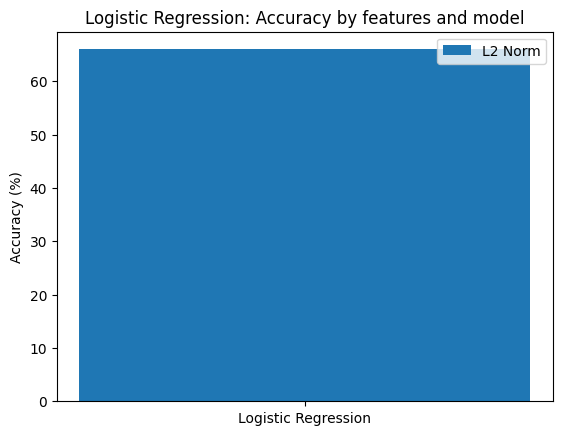

In [ ]:
x = np.arange(1)  # the label locations
width = 0.01  # the width of the bars
labels = ["Logistic Regression"]
fig, ax = plt.subplots()
rects1 = ax.bar(x, test_acc_all*100, width, label='L2 Norm', capsize=4)
# rects1 = ax.bar(x - 1.5*width, test_acc_l2_kurt*100, width, label='Metric 2', capsize=4)
# rects2 = ax.bar(x - 0.5*width, test_acc_RMS_kurt*100, width, label='Metric 3', capsize=4)
# rects2 = ax.bar(x + 0.5*width, test_acc_RMS_skew*100, width, label='Metric 4', capsize=4)
# rects2 = ax.bar(x + 1.5*width, test_acc_RMS_kurt_skew*100, width, label='Metric 5', capsize=4)
# rects2 = ax.bar(x + 0.5*width, test_acc_all*100, width, label='Metric 6', capsize=4)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_title('Logistic Regression: Accuracy by features and model')
ax.set_xticks(np.arange(0, 1, 1))
ax.set_xticklabels(labels)
ax.legend()


# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate random classification data
y_true = y_test
y_pred = y_test_pred

# Compute confusion matrix
labels = (final_data.labels.unique()).tolist()
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize to show probabilities
print(cm)

# Plot confusion matrix
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


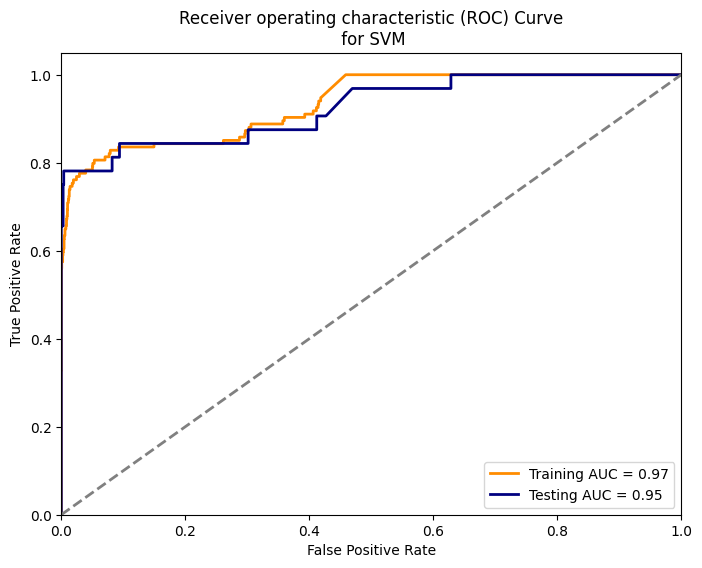

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
# Compute the probabilities for each class
y_train_prob = svm_model.predict_proba(X_train)
y_test_prob = svm_model.predict_proba(X_test)


# Compute the ROC curve and AUC for training and testing sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob[:, 1], pos_label=1)
roc_auc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1], pos_label=1)
roc_auc_test = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

# Plot the ROC curve for training and testing sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Testing AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve\n for SVM')
plt.legend(loc="lower right")
plt.show()

# # Compute and plot the confusion matrix for testing set
# cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# from sklearn.metrics import confusion_matrix
# import seaborn as sn

# plt.figure(figsize=(10,10))
# y_test_pred = lr_model.predict(X_test)
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
# sn.heatmap(cm, annot=True)
# plt.plot()

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# def plot_confusion_matrix(y_true, y_pred, labels):
#     cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.set_title('Confusion Matrix')
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()

# plot_confusion_matrix(y_test, y_test_pred, )

###Decision Tree 


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=7)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training data
train_predictions = dt_classifier.predict(X_train)

# Make predictions on the testing data
test_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the model on the training data
train_acc = accuracy_score(y_train, train_predictions)

# Calculate the accuracy of the model on the testing data
test_acc_all = accuracy_score(y_test, test_predictions)

print(f"Training accuracy: {(train_acc*100):.2f} %")
print(f"Testing accuracy: {(test_acc_all*100):.2f} %")

precision = precision_score(y_test, test_predictions, average = 'weighted')
recall = recall_score(y_test, test_predictions, average = 'weighted')

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Training accuracy: 79.49 %
Testing accuracy: 76.15 %
Precision: 77.92%
Recall: 76.15%


[[0.61538462 0.         0.         0.         0.30769231 0.
  0.07692308 0.         0.         0.         0.        ]
 [0.         0.21875    0.         0.         0.75       0.
  0.         0.         0.         0.         0.03125   ]
 [0.         0.         0.         0.07142857 0.92857143 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.08888889 0.91111111 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.00773694 0.98065764 0.
  0.00193424 0.         0.00773694 0.         0.00193424]
 [0.         0.         0.         0.         0.42105263 0.57894737
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.20754717 0.
  0.75471698 0.         0.         0.03773585 0.        ]
 [0.         0.         0.         0.         0.48611111 0.
  0.06944444 0.40277778 0.         0.         0.04166667]
 [0.         0.         0.         0.         0.

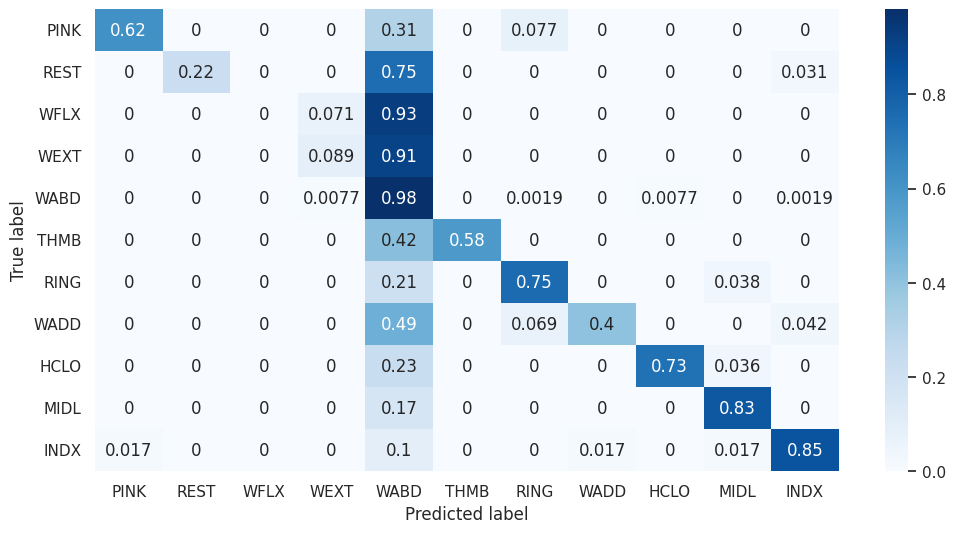

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate random classification data
y_true = y_test
y_pred = test_predictions

# Compute confusion matrix
labels = (final_data.labels.unique()).tolist()
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize to show probabilities
print(cm)

# Plot confusion matrix
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


###Linear Discriminant Analysis

In [ ]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr')
lda_model.fit(X_train, y_train)

# Predict labels for training and testing sets
y_train_pred = lda_model.predict(X_train)
y_test_pred = lda_model.predict(X_test)

# Calculate accuracy for training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc_all = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {(train_acc*100):.2f} %")
print(f"Testing accuracy: {(test_acc_all*100):.2f} %")

precision = precision_score(y_test, y_test_pred, average = 'weighted')
recall = recall_score(y_test, y_test_pred, average = 'weighted')

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Training accuracy: 71.36 %
Testing accuracy: 73.66 %
Precision: 73.25%
Recall: 73.66%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate random classification data
y_true = y_test
y_pred = y_test_pred

# Compute confusion matrix
labels = (final_data.labels.unique()).tolist()
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize to show probabilities
print(cm)

# Plot confusion matrix
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_test = knn_model.predict(X_test)

# Calculate the train and test accuracies
train_acc = knn_model.score(X_train, y_train)
test_acc_all = knn_model.score(X_test, y_test)

print(f"Training accuracy: {(train_acc*100):.2f} %")
print(f"Testing accuracy: {(test_acc_all*100):.2f} %")

precision = precision_score(y_test, y_pred_test, average = 'weighted')
recall = recall_score(y_test, y_pred_test, average = 'weighted')

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Training accuracy: 87.40 %
Testing accuracy: 84.96 %
Precision: 85.08%
Recall: 84.96%


In [ ]:
# Individual metrics 

l2_norm = np.array(feature_1)

variance = np.array(feature_2)

RMS = np.array(feature_3)

kurt = np.array(feature_4)

skew = np.array(feature_5)

In [ ]:
# Combined Metrics 

l2_kurt = np.append(l2_norm, kurt, axis = 1) # 68%
RMS_kurt = np.concatenate((l2_norm,  kurt), axis = 1) # 68%
RMS_skew = np.concatenate((RMS, skew), axis = 1) # 66%
RMS_kurt_skew = np.concatenate((RMS, kurt, skew), axis = 1) # 68%
all_combine = np.concatenate((l2_norm, variance, RMS, kurt, skew), axis = 1) # 72%


In [ ]:
# Train and Test data for the models 

X_train, X_test, y_train, y_test = train_test_split(l2_norm, final_labels, test_size=0.20, random_state=42)

### SVM

In [ ]:


svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto', probability=True)

# fit the SVM model on the training data
svm_model.fit(X_train, y_train)

# predict on the train and test data
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# calculate the train and test accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc_all = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {(train_acc*100):.2f} %")
print(f"Testing accuracy: {(test_acc_all*100):.2f} %")


precision = precision_score(y_test, y_test_pred, average = 'weighted')
recall = recall_score(y_test, y_test_pred, average = 'weighted')

print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Training accuracy: 84.59 %
Testing accuracy: 83.33 %
Precision: 86.55%
Recall: 83.33%


## NN Models 

## Keras Deep Learning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
classificator = Sequential()
classificator.add(Dense(units = 34, activation = 'softmax', input_dim = X_train.shape[1]))
classificator.add(Dense(units = 34, activation = 'softmax'))
classificator.add(Dense(units = 11, activation = 'sigmoid'))
classificator.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy',metrics.categorical_accuracy])
classificator.fit(X_train, np.array(y_train) , batch_size = 10, epochs = 100)
y_pred = classificator.predict(X_test)
test_loss, test_acc_all, test_categorical_accuracy = classificator.evaluate(X_test, np.array(y_test))
print('Test accuracy:', test_acc_all)



Epoch 1/100
418/418 [==============================] - 2s 3ms/step - loss: 2.1701 - accuracy: 0.4668 - categorical_accuracy: 0.0000e+00
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 1.8765 - accuracy: 0.4946 - categorical_accuracy: 0.0000e+00
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 1.7191 - accuracy: 0.4946 - categorical_accuracy: 0.0000e+00
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 1.5855 - accuracy: 0.4946 - categorical_accuracy: 0.0000e+00
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 1.4965 - accuracy: 0.5296 - categorical_accuracy: 0.0000e+00
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 1.4323 - accuracy: 0.5699 - categorical_accuracy: 0.0000e+00
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 1.3775 - accuracy: 0.5826 - categorical_accuracy: 0.0434
Epoch 8/100
418/418 [==============================]

33/33 [==============================] - 0s 2ms/step - loss: 1.9776 - accuracy: 0.4952 - categorical_accuracy: 0.0000e+00
Test accuracy: 0.495210736989975


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# Generate ROC curve and calculate AUC
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 11
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
import matplotlib.pyplot as plt
plt.figure()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink', 'grey']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()








ValueError: ignored

## About the Model

This is a neural network architecture built using the Keras library. It is a feedforward network, meaning the information flows from the input layer, through the hidden layers, to the output layer.

The network has three layers: two hidden layers and one output layer.

The first layer has 34 units and uses the softmax activation function. The input dimension of this layer is set to the number of columns in the input data, which is determined by the shape of the training data.

The second hidden layer also has 34 units and uses the softmax activation function.

The output layer has 11 units, which corresponds to the number of classes in the output, and uses the sigmoid activation function.

The optimizer used in this code is Adam, which is an algorithm for stochastic gradient descent. The loss function is 'sparse_categorical_crossentropy', which is suitable for multi-class classification problems. The metrics used for evaluation during training are accuracy and categorical accuracy.

During training, the model is trained for 100 epochs with a batch size of 10. After training, the model is used to predict the output for the test set